#  


#  


#  


#  


라이브러리 import
==============

In [1]:
# pandas : 데이터 가공
# image : 이미지 출력
# pyplot : 시각화
# folium : 지도 이용
# seaborn : 시각화

import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import folium
from folium.plugins import MarkerCluster
import seaborn as sns


#  


#  


#  


#  


파싱 해놓은 데이터 가져오기
=====================

#  


#### 1. 2023년 01 ~ 06월 따릉이 이용 데이터

In [2]:
bicycle = pd.read_csv('data/bicycle.csv')
bicycle

대여소번호                           대여소   성별   연령대     운동량  year  month  \
0           735                   735. 영도초등학교  NaN  ~10대   39.57  2023      1   
1           746                 746. 목동2단지 상가  NaN  ~10대   28.51  2023      1   
2           505           505. 자양사거리 광진아크로텔 앞  NaN  ~10대   19.56  2023      1   
3          1153       1153. 발산역 1번, 9번 인근 대여소  NaN  ~10대   70.37  2023      1   
4          1155                 1155. 기쁜우리복지관  NaN  ~10대   40.86  2023      1   
...         ...                           ...  ...   ...     ...   ...    ...   
10624950   3504                    3504. 원일교회    M    기타   22.24  2023      6   
10624951    722  722. 경서농협 버스정류장(우리은행신정동지점방향)    M    기타  144.53  2023      6   
10624952    723                   723. SBS방송국    M    기타  232.65  2023      6   
10624953    725               725. 양강중학교앞 교차로    M    기타   27.94  2023      6   
10624954    726            726. 목동3단지 시내버스정류장    M    기타  137.68  2023      6   

          day  자치구  
0           1  양천구  
1           1  양천구  
2           1  광진구  
3           1  강서구  
4           1  강서구  
...       ...  ...  
10624950   30  광진구  
10624951   30  양천구  
10624952   30  양천구  
10624953   30  양천구  
10624954   30  양천구  

[10624955 rows x 9 columns]

-------------

#### 2. 2023년 06월 기준 따릉이 대여소 데이터

In [3]:
rental = pd.read_csv('data/rental.csv')
rental.head()

대여소번호          대여소명  자치구         위도          경도
0    301   경복궁역 7번출구 앞  종로구  37.575794  126.971451
1    302   경복궁역 4번출구 뒤  종로구  37.575947  126.974060
2    303   광화문역 1번출구 앞  종로구  37.571770  126.974663
3    305        종로구청 옆  종로구  37.572559  126.978332
4    307     서울역사박물관 앞  종로구  37.570000  126.971100

-------------

#### 3. 2023년 01 ~ 06월 날씨 데이터

In [4]:
weather = pd.read_csv('data/weather.csv')
weather.head()

avgTa  sumRn  avgWs  year  month  day
0   -0.2    0.0    2.7  2023      1    1
1   -4.5    0.0    2.5  2023      1    2
2   -5.0    0.0    1.8  2023      1    3
3   -1.8    0.0    1.9  2023      1    4
4   -1.6    0.0    1.6  2023      1    5

-------------

#### 4. 2017년 서울시 연령별 체력 측정 데이터

In [5]:
strength = pd.read_csv('data/strength.csv')
strength.head()

성별        통계분류(1) 통계분류(2)  19~24세  25~29세  30~34세  35~39세  40~44세  45~49세  \
0  남성  20m왕복오래달리기(회)      평균    48.2    47.6    45.8    43.6    42.4    34.5   
1  여성  20m왕복오래달리기(회)      평균    25.7    30.4    25.5    21.0    20.3    18.6   

   50~54세  55~59세  60~64세  
0    30.2    30.4    27.6  
1    18.0    12.4    12.2

------------------

#  


#  


#  


#  


데이터 시각화
==========


In [6]:
# 서울시 구 별로 나눠놓은 json파일 받아오기
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# 구 목록, 개수 데이터프레임으로 뽑음
rentalGoo = rental['자치구'].value_counts().reset_index()

# 컬럼 이름 설정
rentalGoo.columns = ['자치구', '대여소 개수']

# 맵 생성
DdaRengEe = folium.Map(
    location = [37.566345, 126.977893], zoom_start = 11.5
)

# 가까운 팝업끼리 묶어놓는 클러스터 추가
marker_cluster = MarkerCluster().add_to(DdaRengEe)

# 뽑아놓은 데이터를 기반으로 맵에 분류, 색칠
folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = rentalGoo,
    columns = ['자치구','대여소 개수'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity=0.7,
    line_opacity = 0.2,
).add_to(DdaRengEe)

# 팝업 추가
for i in range(len(rental)):
    lat = rental.loc[i, '위도']
    long = rental.loc[i, '경도']
    name = rental.loc[i,'대여소명']
    num = rental.loc[i, '대여소번호']
    rename = "".join(name.split())
    link = '<a href = ' + "https://map.naver.com/p/search/" + rename + "대여소" +' target=_blink>' + name + ' 네이버 플레이스</a>'
    icon = folium.Icon(color = "green", icon = "fa-solid fa-bicycle", prefix = 'fa-solid')
    folium.Marker(location = [lat, long]
                  , tooltip = name
                  , popup = folium.Popup(link, max_width=650)
                  , icon = icon).add_to(marker_cluster)    

DdaRengEe.save("DdaRengEe_Map.html")
DdaRengEe

#  


#  


#  


데이터 분석 및 결론 도출
=================

#  


### 1. 따릉이 이용률과 기온은 연관이 있을까?
(비교 데이터 : 따릉이 이용 데이터 <-> 날씨 데이터) 

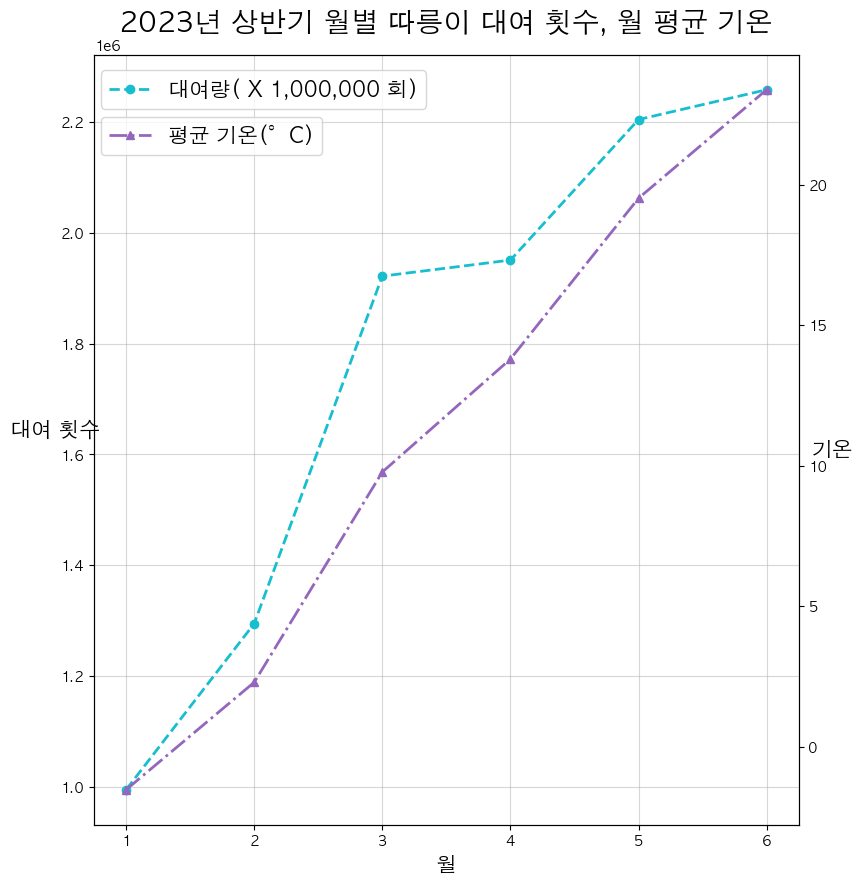

In [7]:
month = [1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))

# 첫 번째 그래프
ax1 = plt.subplot(1, 2, 1)
ax1.plot(bicycle['month'].value_counts().loc[month].index, bicycle['month'].value_counts().loc[month].values, label = '대여량( X 1,000,000 회)', ls = '--', c = 'C9', marker = 'o', linewidth = 2)
ax1.grid(alpha=0.5)
ax1.legend(fontsize=15, loc=[0.01, 0.93])
ax1.set_xlabel('월', size=15)
ax1.set_ylabel('대여 횟수', size=15, rotation=0)
ax1.set_title('2023년 상반기 월별 따릉이 대여 횟수, 월 평균 기온', size=20)

# 두 번째 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(weather.groupby('month')['avgTa'].mean().index, weather.groupby('month')['avgTa'].mean().values, label = '평균 기온(°C)', ls = '-.', c = 'C4', marker = '^', linewidth = 2)
ax2.legend(fontsize=15, loc=[0.01, 0.87])
ax2.set_ylabel('기온', size=15, rotation=0)

plt.show()


>결론 : 
>   >월 별 이용률 그래프와 월 평균 기온 그래프가 비슷한 양상 
>   >   >이용률과 기온은 비례한 관계가 성립한다는 결론 도출

--------------------------

#  


### 2. 따릉이 이용률과 강수량 또는 풍속은 연관이 있을까?
(비교 데이터 : 따릉이 이용 데이터 <-> 날씨 데이터)

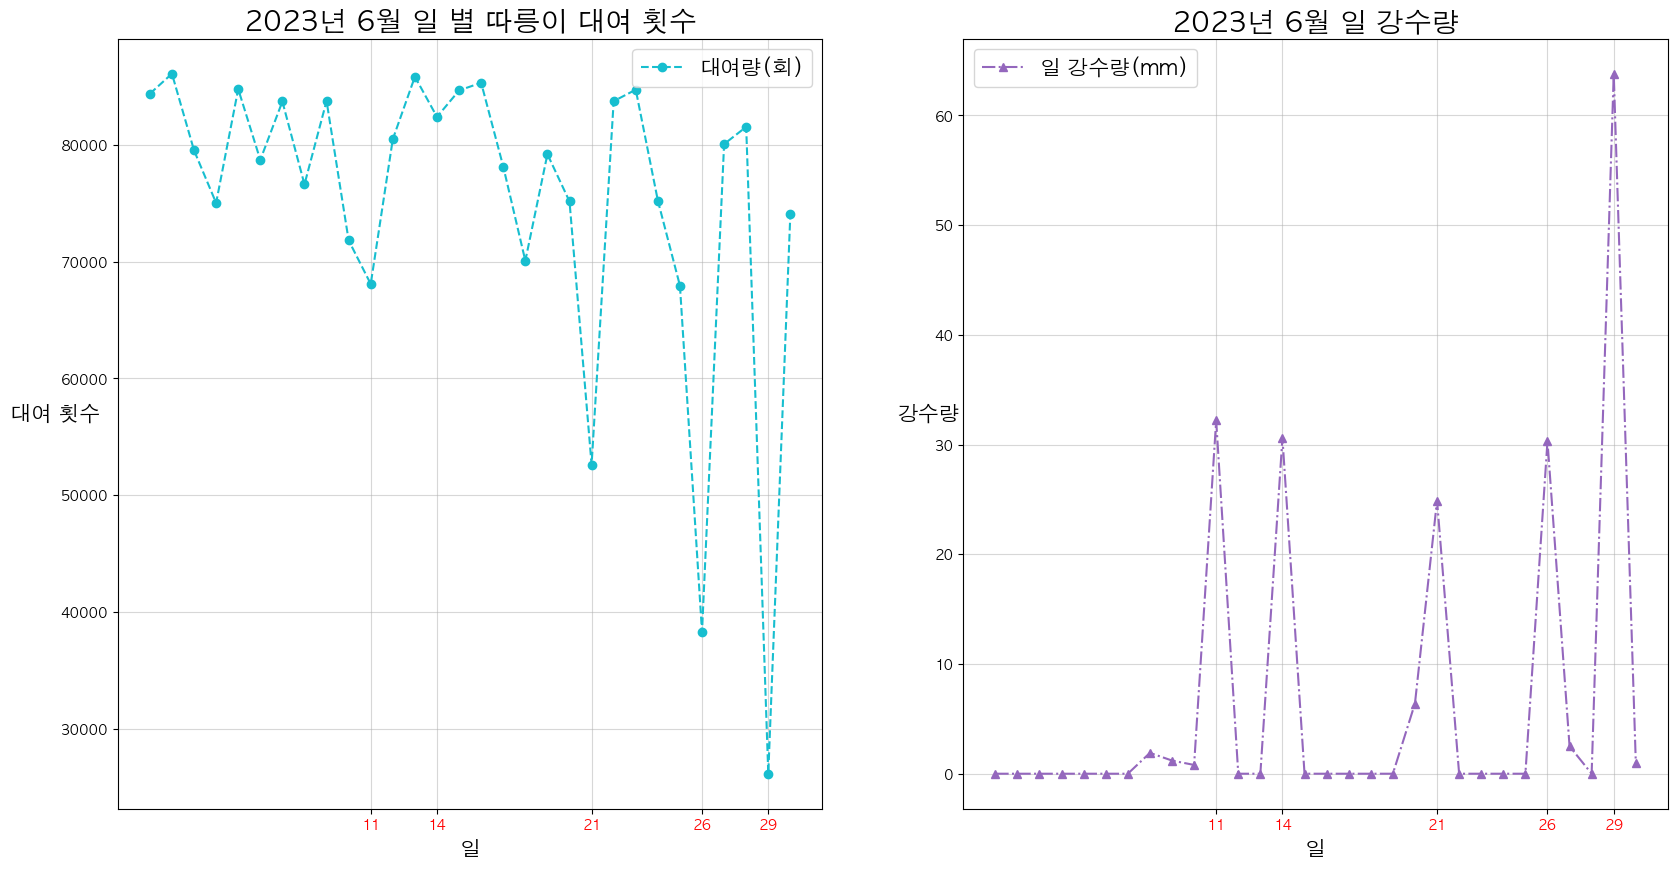

In [8]:
def plot_bicycle_rentals(month, rainy_days):
    plt.plot(
        bicycle[bicycle['month'] == month]['day'].value_counts().sort_index().index,
        bicycle[bicycle['month'] == month]['day'].value_counts().sort_index().values,
        label='대여량(회)',
        ls='--',
        c='C9',
        marker='o'
    )
    plt.grid(alpha=0.5)
    plt.legend(fontsize=15)
    plt.xlabel('일', size=15)
    plt.ylabel('대여 횟수', size=15, rotation=0)
    plt.title(f'2023년 {month}월 일 별 따릉이 대여 횟수', size=20)
    plt.xticks(rainy_days, color='red')

def plot_weather_data(month, y_data, label, linestyle, color, marker, y_label, title):
    plt.plot(weather[weather['month'] == month]['day'].values, y_data, label=label, ls=linestyle, c=color, marker=marker)
    plt.grid(alpha=0.5)
    plt.legend(fontsize=15)
    plt.xlabel('일', size=15)
    plt.ylabel(y_label, size=15, rotation=0)
    plt.title(title, size=20)
    plt.xticks(rainy_days, color='red')

plt.figure(figsize=(20, 10))

rainy_days = [11, 14, 21, 26, 29]
month = 6

# Plot 1
plt.subplot(1, 2, 1)
plot_bicycle_rentals(month, rainy_days)

# Plot 2
plt.subplot(1, 2, 2)
plot_weather_data(month, weather[weather['month'] == month]['sumRn'].values, '일 강수량(mm)', '-.', 'C4', '^', '강수량', f'2023년 {month}월 일 강수량')

# # Plot 3
# plt.subplot(2, 2, 2)
# plot_bicycle_rentals(month, rainy_days)

# # Plot 4
# plt.subplot(2, 2, 4)
# plot_weather_data(month, weather[weather['month'] == month]['avgWs'].values, '평균 풍속(m/s)', '-.', 'C4', '^', '풍속', f'2023년 {month}월 일 평균 풍속')

plt.show()


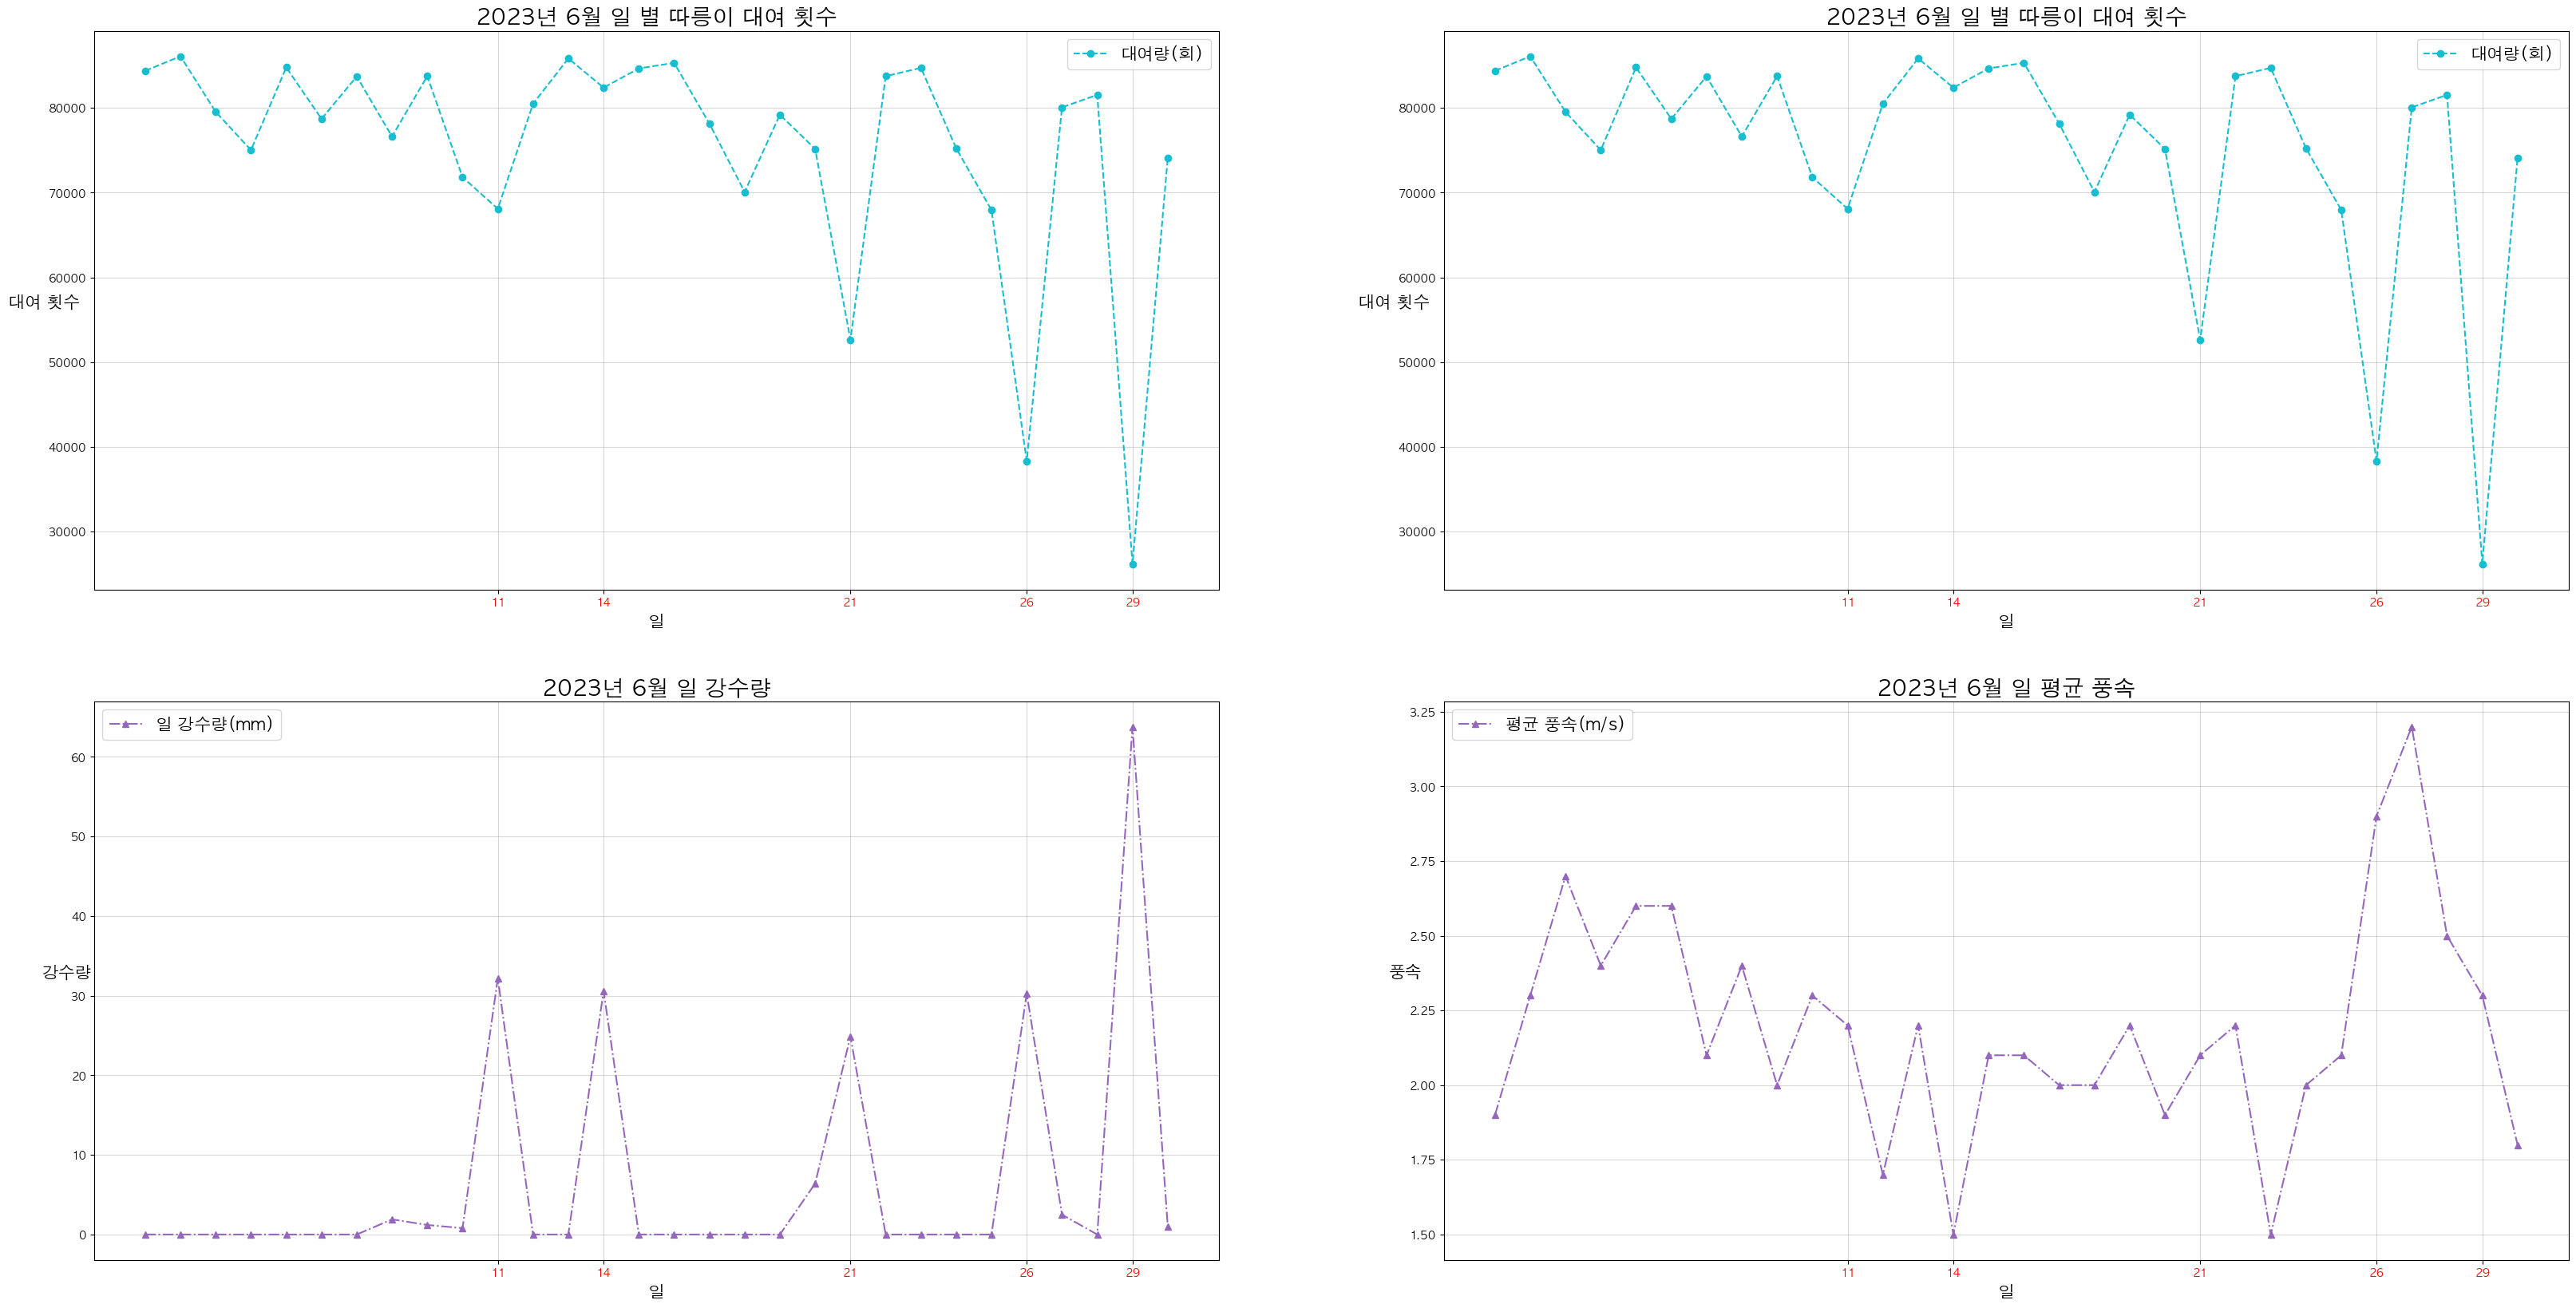

In [9]:
def plot_bicycle_rentals(month, rainy_days):
    plt.plot(
        bicycle[bicycle['month'] == month]['day'].value_counts().sort_index().index,
        bicycle[bicycle['month'] == month]['day'].value_counts().sort_index().values,
        label='대여량(회)',
        ls='--',
        c='C9',
        marker='o'
    )
    plt.grid(alpha=0.5)
    plt.legend(fontsize=15)
    plt.xlabel('일', size=15)
    plt.ylabel('대여 횟수', size=15, rotation=0)
    plt.title(f'2023년 {month}월 일 별 따릉이 대여 횟수', size=20)
    plt.xticks(rainy_days, color='red')

def plot_weather_data(month, y_data, label, linestyle, color, marker, y_label, title):
    plt.plot(weather[weather['month'] == month]['day'].values, y_data, label=label, ls=linestyle, c=color, marker=marker)
    plt.grid(alpha=0.5)
    plt.legend(fontsize=15)
    plt.xlabel('일', size=15)
    plt.ylabel(y_label, size=15, rotation=0)
    plt.title(title, size=20)
    plt.xticks(rainy_days, color='red')

plt.figure(figsize=(40, 20))

rainy_days = [11, 14, 21, 26, 29]
month = 6

# Plot 1
plt.subplot(2, 2, 1)
plot_bicycle_rentals(month, rainy_days)

# Plot 2
plt.subplot(2, 2, 3)
plot_weather_data(month, weather[weather['month'] == month]['sumRn'].values, '일 강수량(mm)', '-.', 'C4', '^', '강수량', f'2023년 {month}월 일 강수량')

# Plot 3
plt.subplot(2, 2, 2)
plot_bicycle_rentals(month, rainy_days)

# Plot 4
plt.subplot(2, 2, 4)
plot_weather_data(month, weather[weather['month'] == month]['avgWs'].values, '평균 풍속(m/s)', '-.', 'C4', '^', '풍속', f'2023년 {month}월 일 평균 풍속')

plt.show()


>결론 :
>   >따릉이 이용률이 급격히 하락했던 11, 14, 21, 26, 29일에 정확히 강수량이 높았음  
>   >따릉이 이용률이 급격히 하락할 때 풍속이 느리기도(18일), 빠르기도(26일) 했음
>   >   >이용률과 강수량은 반비례한 관계가 성립한다는 결론 도출  
>   >   >이용률과 풍속, 심지어 강수량과 풍속 또한 연관성을 찾기 힘들다는 결과 도출

-------------------------

#  


### 3. 따릉이 이용률과 자치구 별 대여소 개수가 연관이 있을까?
(비교 데이터 : 따릉이 이용 데이터 <-> 따릉이 대여소 데이터)

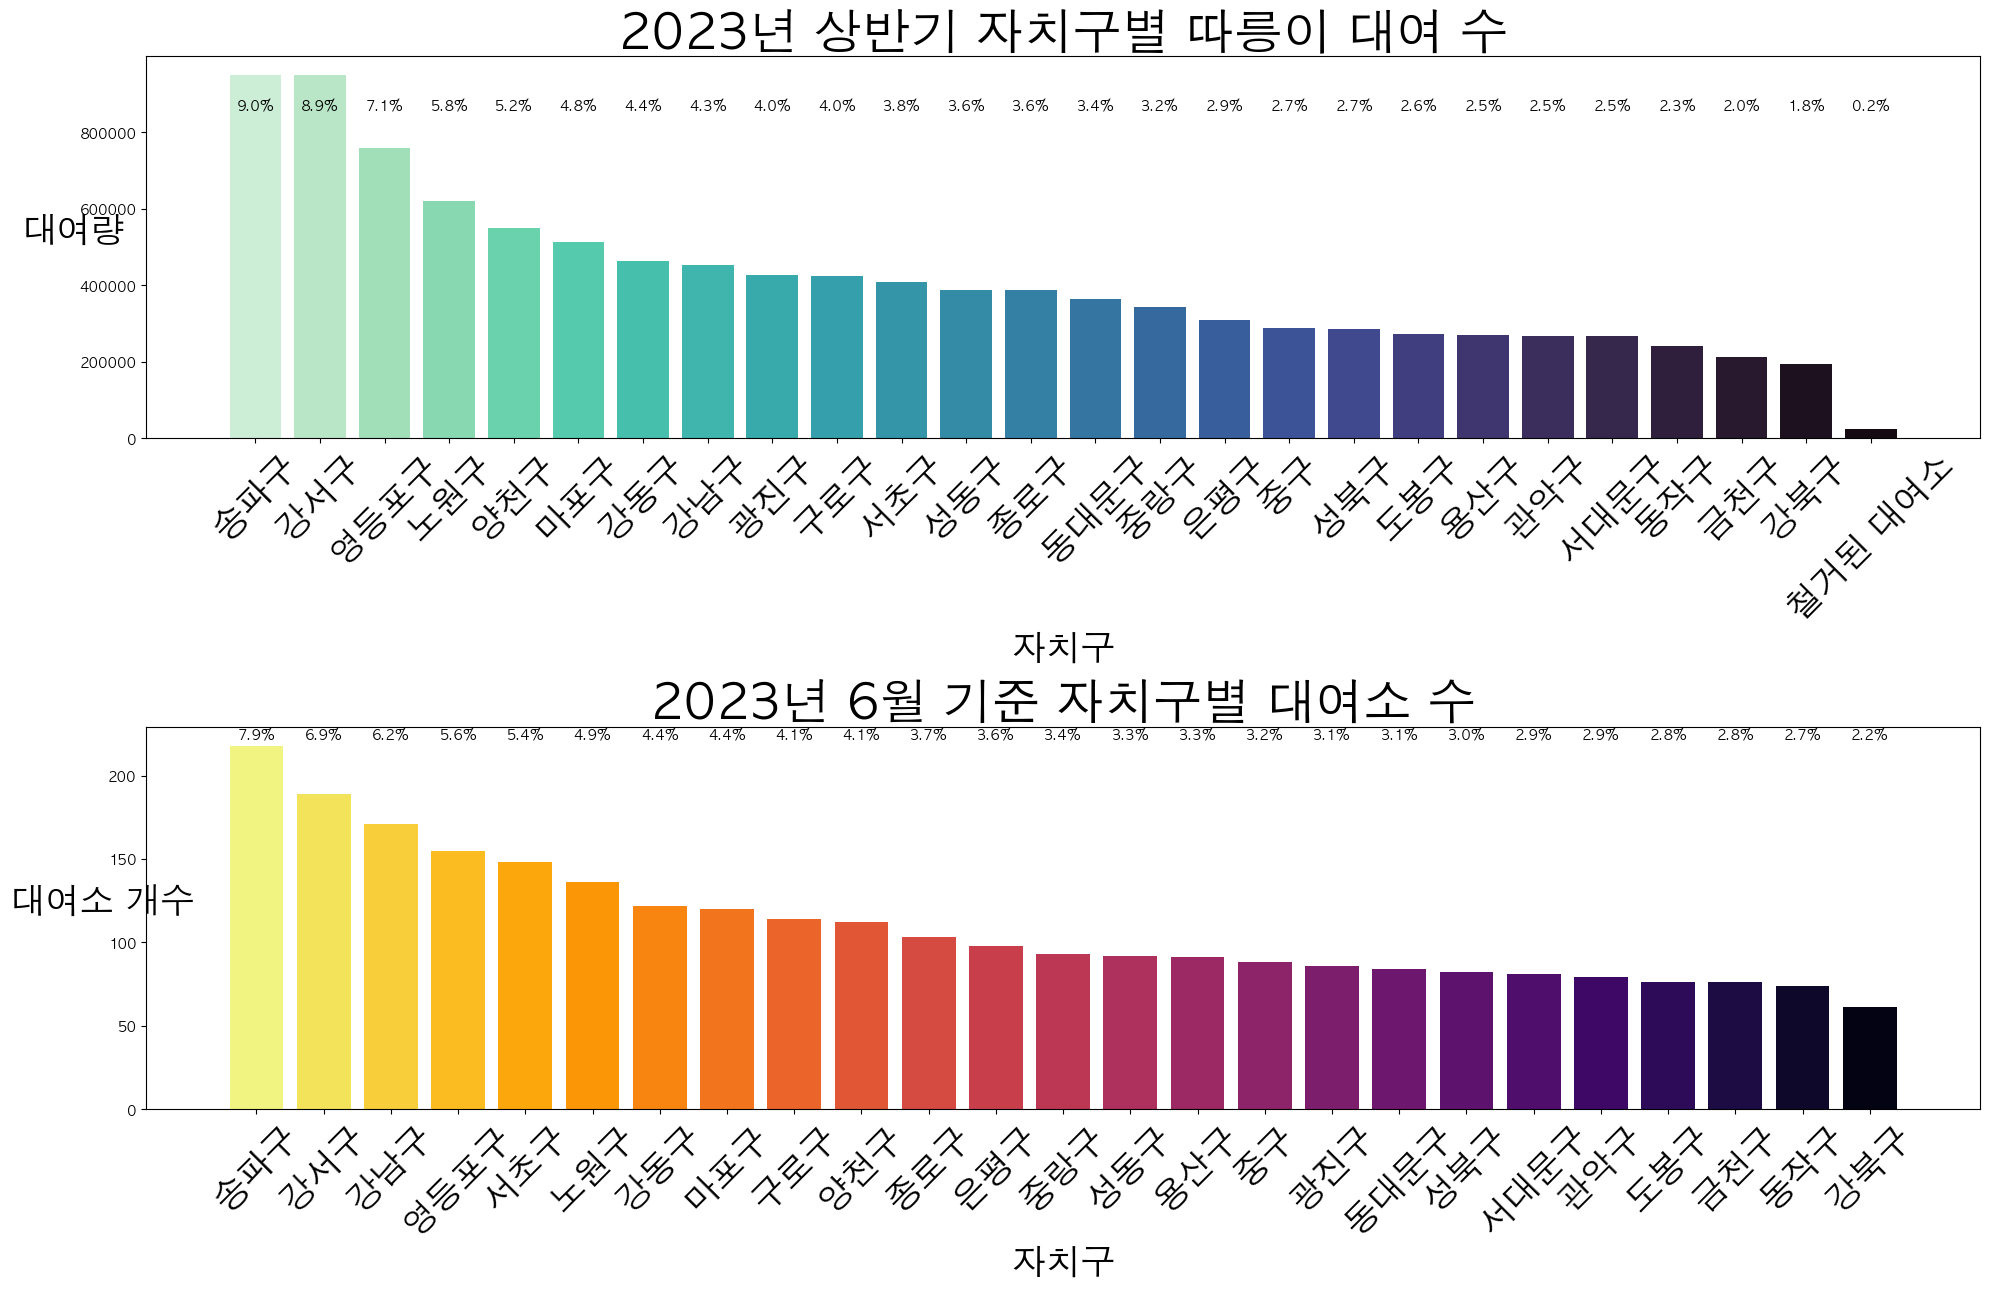

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# value_counts()의 인덱스를 리스트로
bList = bicycle['자치구'].value_counts().index.tolist()
rList = rental['자치구'].value_counts().index.tolist()

# 컬러맵 설정
b_colors = list(reversed(sns.color_palette("mako", n_colors=len(bList))))
r_colors = list(reversed(sns.color_palette("inferno", n_colors=len(rList))))

plt.figure(figsize=(20, 13))

# 따릉이 데이터
plt.subplot(2, 1, 1)
b_counts = bicycle['자치구'].value_counts().values
plt.bar(bList, b_counts, color=b_colors)
plt.title('2023년 상반기 자치구별 따릉이 대여 수', fontsize=35)
plt.xlabel('자치구', fontsize=25)
plt.ylabel('대여량', rotation=0, fontsize=25)
plt.xticks(rotation=45, fontsize=25)

# 대여소 데이터
plt.subplot(2, 1, 2)
r_counts = rental['자치구'].value_counts().values
plt.bar(rList, r_counts, color=r_colors)
plt.title('2023년 6월 기준 자치구별 대여소 수', fontsize=35)
plt.xlabel('자치구', fontsize=25)
plt.ylabel('대여소 개수', rotation=0, fontsize=25)
plt.xticks(rotation=45, fontsize=25)

# 각 막대에 퍼센트 값 추가
def add_percentage_labels(ax, counts):
    total = sum(counts)
    for i, count in enumerate(counts):
        percentage = count / total * 100
        ax.text(i, 0.08 * total, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

add_percentage_labels(plt.subplot(2, 1, 1), b_counts)
add_percentage_labels(plt.subplot(2, 1, 2), r_counts)

plt.tight_layout()
plt.show()


>결론 :
>   >대여 수 상위 2개 구(송파, 강서)와 대여소 수 상위 2개 구(송파, 강서)가 동일  
>   >대여 수 하위 3개 구(강북, 금천, 동작)와 대여소 수 하위 3개 구(강북, 동작, 금천)가 동일  
>   >   >조금 씩 차이가 나는 구가 있지만 대부분 대여수가 많을 수록 대여소도 많음  
>   >   >   >자치구 별 따릉이 이용률과 대여소 수는 비례한 관계가 성립한다는 결과 도출


#  


### 4. 따릉이 이용시 운동량과 연령대는 연관이 있을까??
(비교 데이터 : 따릉이 이용 데이터 <-> 연령별 체력측정 데이터)

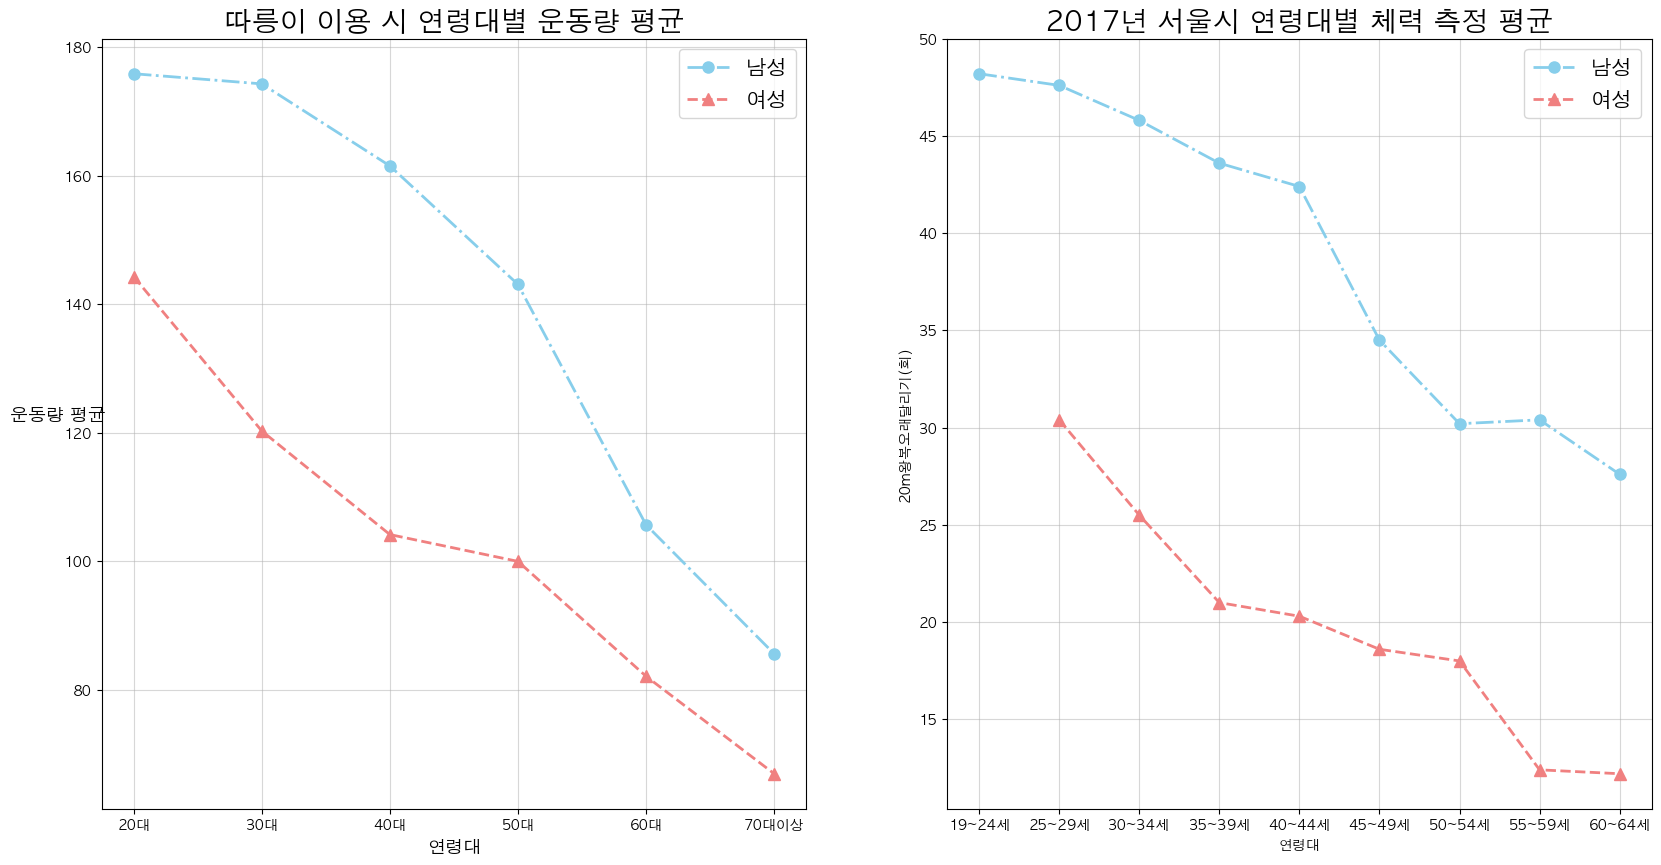

In [11]:

# '성별'이 'M'이고 각 '연령대'별 '운동량'의 평균값 계산
male = bicycle[bicycle['성별'] == 'M'].groupby('연령대')['운동량'].mean()
female = bicycle[bicycle['성별'] == 'F'].groupby('연령대')['운동량'].mean()

# '연령대' 열의 순서를 정의
age_order = ['20대', '30대', '40대', '50대', '60대', '70대이상']

# '연령대' 순서대로 정렬
male = male.reindex(age_order)
female = female.reindex(age_order)

# 그래프 작성
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# 첫 번째 서브플롯
axs[0].plot(male.index, male.values, label="남성", marker='o', color='skyblue', linestyle='-.', linewidth=2, markersize=8)
axs[0].plot(female.index, female.values, label="여성", marker='^', color='lightcoral', linestyle='--', linewidth=2, markersize=8)
axs[0].legend(fontsize=15)
axs[0].grid(alpha=0.5)
axs[0].set_xlabel('연령대', fontsize=13)
axs[0].set_ylabel('운동량 평균', rotation=0, fontsize=13)
axs[0].set_title('따릉이 이용 시 연령대별 운동량 평균', fontsize=20)
axs[0].grid(alpha=0.5)

# 두 번째 서브플롯
axs[1].plot(strength.iloc[0, 3:12].index, strength.iloc[0, 3:12].values, label="남성", marker='o', color='skyblue', linestyle='-.', linewidth=2, markersize=8)
axs[1].plot(strength.iloc[1, 4:12].index, strength.iloc[1, 4:12].values, label="여성", marker='^', color='lightcoral', linestyle='--', linewidth=2, markersize=8)
axs[1].grid(alpha=0.5)
axs[1].set_xlabel('연령대')
axs[1].set_ylabel('20m왕복오래달리기(회)')
axs[1].legend(fontsize=15)
axs[1].set_title('2017년 서울시 연령대별 체력 측정 평균', fontsize=20)



plt.show()

>결론 :
>   >따릉이와 체력측정 데이터 모두 연령대가 높아질 수록 운동량과 달리기 횟수가 줄어듬
>   >   >연령대가 높아질 수록 운동 수행 능력이 떨어지기 때문에 따릉이 운행거리가 줄어든다는 결론을 도출